In [ ]:
from spks import *
kilosort_path = Path('/home/data/JC131/20231004_181500/kilosort2.5/imec0/')

# load clusters in the folder
clu = Clusters(kilosort_path,get_waveforms=False,load_template_features=True)

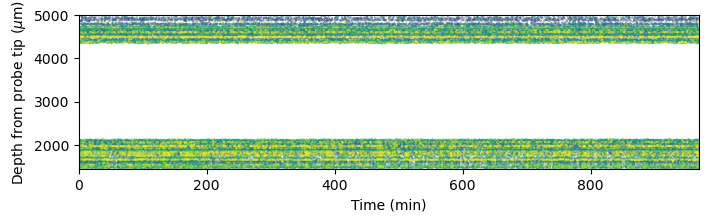

In [12]:
# there are multiple ways to plot the drift raster one is using the Clusters object.
plt.figure(figsize = [8,2])

clu.plot_drift_map(clim = [0,2000])

plt.ylabel('Depth from probe tip ($\mu$m)')
plt.xlabel('Time (min)');


In [8]:
# this is not really needed because the flag  load_template_features=True already did this
# but used to recompute the depths if something changed
# estimate the spike amplitudes and depths from the templates 
clu.compute_template_amplitudes_and_depths() 

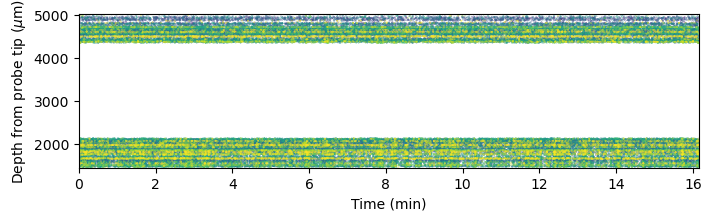

In [10]:
# plot the drift map
%matplotlib inline
plt.figure(figsize = [8,2])

# get a random subset of spikes to plot
n_spikes_to_plot = 100000 
idx = np.random.choice(np.arange(len(clu.spike_times)),np.min([n_spikes_to_plot,len(clu.spike_times)]),replace=False)
idx = idx[np.argsort(np.take(clu.spike_amplitudes,idx,axis=0))]

# the drift map is just a scatter of spike times versus spike positions, the amplitude is the color
# note that this spike amplitudes that come from the templates so are unit-less for now.
plt.scatter(clu.spike_times[idx]/clu.sampling_rate/60,
            clu.spike_positions[idx,1], 0.03,
            clu.spike_amplitudes[idx],clim=[0,2000])
plt.ylabel('Depth from probe tip ($\mu$m)')
plt.xlabel('Time (min)');
# set the axis
plt.axis([0,
          np.max(clu.spike_times[idx]/clu.sampling_rate/60), # max time
          np.min(clu.channel_positions[:,1]), # max channel
          np.max(clu.channel_positions[:,1])],# min channel 
        );